In [1]:
# --- Install required libraries ---
!pip install torch torchvision matplotlib medmnist pytorch-fid --quiet


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import ConcatDataset

import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torchvision.transforms.functional as F

import medmnist
from medmnist import INFO, Evaluator

In [3]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/


# We first work on a 2D dataset with size 28x28

In [4]:
data_flag = 'bloodmnist'
download = True
BATCH_SIZE = 128

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

## First, we read the MedMNIST data, preprocess them, concatenate them and encapsulate them into dataloader form.

In [5]:

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load all splits
train = DataClass(split='train', transform=data_transform, download=True)
val = DataClass(split='val', transform=data_transform, download=True)
test = DataClass(split='test', transform=data_transform, download=True)

# Combine them into a single dataset
full_dataset = ConcatDataset([train, val, test])
dataloader = DataLoader(full_dataset, batch_size=128, shuffle=True)

100%|██████████| 35.5M/35.5M [00:06<00:00, 5.09MB/s]


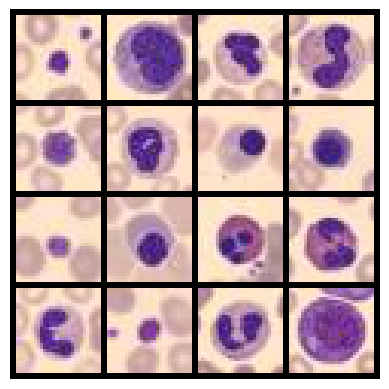

In [6]:
# visualization
# Get a few samples
samples = [full_dataset[i][0] for i in range(16)]  # assuming (image, label) tuples

# Make a grid
grid = make_grid(samples, nrow=4)

# Display
plt.imshow(F.to_pil_image(grid))
plt.axis('off')
plt.show()

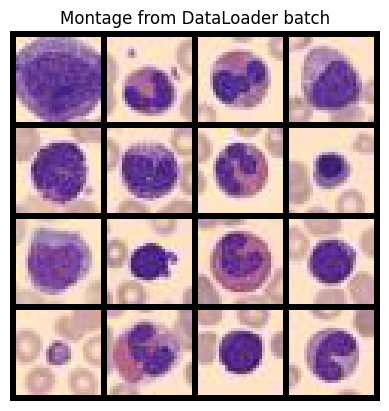

In [7]:
#Another option to visualize the dataset
data_iter = iter(dataloader)
images, labels = next(data_iter)  # get one batch

# Make grid
grid = make_grid(images[:16], nrow=4)  # you can adjust how many to show

# Display
plt.imshow(F.to_pil_image(grid))
plt.axis('off')
plt.title("Montage from DataLoader batch")
plt.show()

In [8]:
#assess image size
print(f"Image size: {images[0].shape}")

#assess label size
print(f"Label size: {labels[0].shape}")

#assess label values
s = set()
for i in range(len(labels)):
    s.add(labels[i].item())
print(f"Label values: {s}")

Image size: torch.Size([3, 28, 28])
Label size: torch.Size([1])
Label values: {0, 1, 2, 3, 4, 5, 6, 7}


# SETUP

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
